In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
class StohasticProcess1D:
    def __init__(self, n):
        '''
        each cell has 1000
        '''
        self.n = n
        self.cells =  np.full(n, 1000, int)

        self.move_left = np.random.rand(n)
        self.move_right = np.random.rand(n)
        self.stay = np.random.rand(n)
        s = self.move_right + self.move_left + self.stay
        self.move_left /= s
        self.move_right /= s
        self.stay /= s
    
    def get_cells(self):
        return self.cells
    
    def get_move_left(self):
        return self.move_left
    
    def get_move_right(self):
        return self.get_move_right
    
    def get_n(self):
        return self.n
    
    def move(self):
        new_cells = self.cells.copy()
        for i in range(self.n):
            left = int(self.move_left[i] * self.cells[i])
            right = int(self.move_right[i] * self.cells[i])

            new_cells[(i - 1) % self.n] += left
            new_cells[(i + 1) % self.n] += right
            new_cells[i] -= (left + right)
        self.cells = new_cells

    def sum(self):
        return np.sum(self.cells)
    
    def run(self, num_iter):
        self.results = []  # Initialize an empty list to store the results
        for i in range(num_iter):
            self.results.append(self.get_cells())  # Append the current state of cells to the list
            self.move()  # Perform the move operation
            if i > 0 and np.array_equal(self.cells, self.results[-1]):  # Compare with the previous state
                break  # Break the loop if the current state matches the previous state

        self.results = np.array(self.results)  # Convert the list to a NumPy array if needed


    def get_results(self):
        return self.results


    

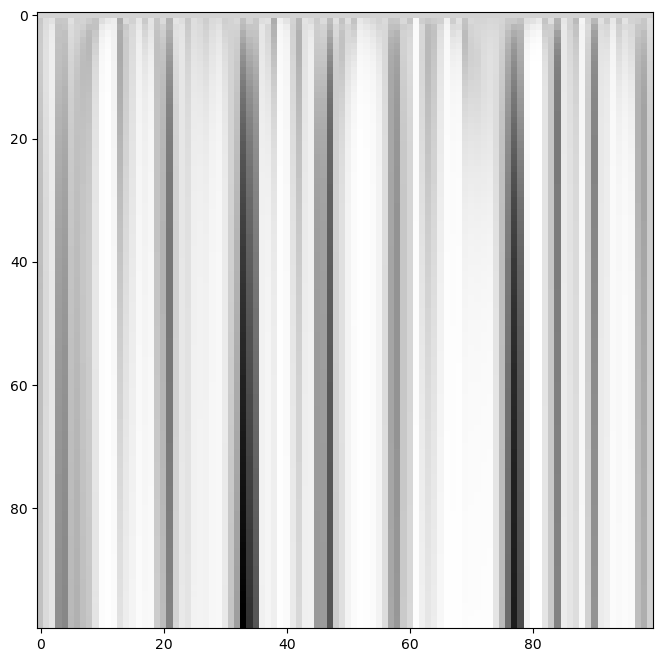

In [79]:
S = StohasticProcess1D(100)
S.run(100)

plt.figure(figsize=(14, 8))
plt.imshow(S.results, cmap="binary")